# Regression and Model Selection

## Classic Curve Fitting and Linear Regression

Given a set of inputs and associated outputs, we want to build a system that will fit some set of input data, $x$, to another set of data, $b$, using a model $A$ with some set of variables. Many of these issues map to the following equation.

$$
Ax = b
$$

We look at evaluating how effective a model is and identifying **Over-** and **Under-determined systems**.

### Over-Determined Systems

In Over-Determined systems, $Ax=b$ cannot directly be satisfied to the set of equations, in many cases, this occurs when there are few variables avaliable to fit the data. So we may want to look at minimizing $Ax-b$ with a penalizing regularizer, $g(x)$ on the solution.

$$
\underset{x}{\operatorname{argmin}} \left( ||Ax-b||_2 + \lambda g(x)\right)
$$

with regularizer $g(x)$

### Under-Determined Systems

In Under-Determined systems there are typically many variables but very few constraints providing for potentially an infinite number of possible solutions. In these cases, an objective function, $g(x)$ is imposed as an additional target contraint while satisfying a viable solution. The solution may also be relaxed to be less than some $\epsilon$ to meet the objective function. 

$$
\underset{x}{\operatorname{argmin}} g(x) \text{ where } ||Ax-b||_2 \leq \epsilon
$$

with regularization term $||Ax-b||_2$ and objective function $g(x)$.

## Non-Linear Regression

### Over-Determined Systems

$$
\underset{x}{\operatorname{argmin}} \left( f(A, x, b) + \lambda g(x)\right)
$$

with regularizer $g(x)$

### Under-Determined Systems

$$
\underset{x}{\operatorname{argmin}} g(x) \text{ where } f(A, x, b) \leq \epsilon
$$

with regularization term $f(A, x, b)$ and objective function $g(x)$.

# Over-fitting and Under-fitting

In the case where as the model complexity increases (number of parameters increases), Over-fitting is more likely to occur where error on training data will go to zero, but does not reflect well on the withhold data as a.

In the case of Under-fitting, the model and/or data cannot reflect well and levels out.

The case of Over-fitting generally occurs more often than underfitting.

![over-under-fitting](graphics/Over-Under-Fitting.png "Over-Under-Fitting")

# Generic Regression

The generic representation of regression is in the following form:

$$
\textbf{Y} = f(\textbf{X}, \mathbf{ \beta })
$$

where $\textbf{X}$ are the input variables, and $\textbf{Y}$ are the output/target variables.

We can specify the model itself, $f$ and the model parameters $\mathbf{\beta}$ and then the objective is to find the values $\mathbf{\beta}$.


## Defining an Error Metric "Goodness of Fit"

Here we need to define some sort of error metric to determine how well the model fits the data.

When we fit the data for point $x_k$ to $y_k$, there will be some error $E_k$:

$$
f(x_k) = y_k + E_k
$$

We typically want to minimize the error, 3 error metrics that are typically used:

#### Maximum Error $(L_\infty)$ Norm

Minimize the highest error of all the points.

$$
E_\infty(f) = \underset{1<k<n}{\operatorname{max}} |f(x_k) - y_k|
$$

#### Mean Absolute Error $(L_1)$ Norm

Average the absolute value of the difference in error.

$$
E_1(f) = \dfrac{1}{n}\sum_{k=1}^{n} |f(x_k) - y_k|
$$

#### Least Squares Error $(L_2)$ Norm

Average the squared difference in error.

$$
E_2(f) = \sqrt{\dfrac{1}{n}\sum_{k=1}^{n} |f(x_k) - y_k|^2}
$$


Choosing how to measure error and the norms will have a large impact on the types of solutions the models will generate. Let's look at the error values **before the summation operation** (ignoring the square-root scaling in L2).

(-1.65, 1.65, -0.11225895316804409, 2.3624885215794307)

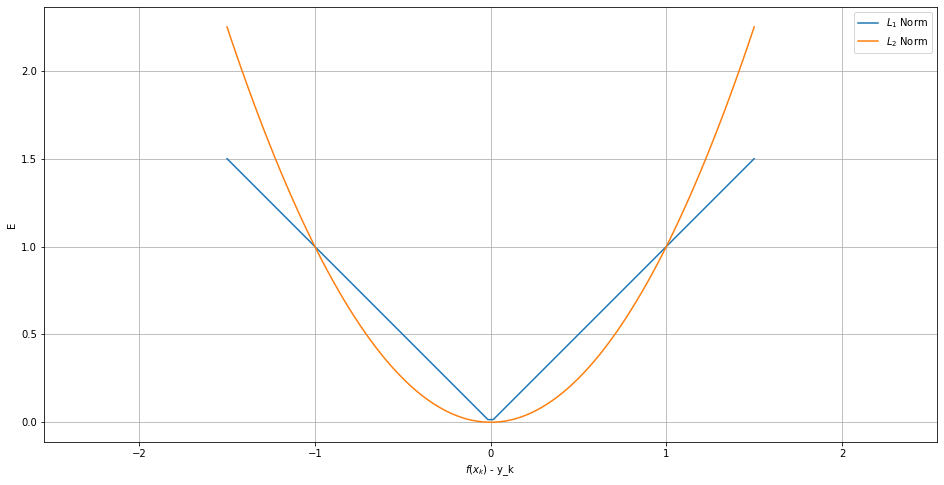

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1.5, 1.5, 100)
L1 = lambda x: np.abs(x)
L2 = lambda x: np.power(x, 2)

E1 = L1(x)
E2 = L2(x)

plt.figure(figsize=(16,8))
plt.plot(x, E1)
plt.plot(x, E2)
plt.xlabel('$f(x_k)$ - y_k')
plt.ylabel('E')
plt.legend(['$L_1$ Norm', '$L_2$ Norm'])
plt.grid()
plt.axis('equal')

## Example: Basic Curve Fitting

Here we'll look at basic curving fitting by fitting some set of given points to a line model

data: $(x_1, y_1), (x_2, y_2), (x_3, y_3), \cdots, (x_n, y_n)$

model: $\textbf{Y} = f(\textbf{X}, \mathbf{ \beta }) = \beta_1\textbf{X} + \beta_2$

# Least-Squares Fitting

We can find the least-squares by minimizing the $E_2$ error, that is:

$$
E_2(f) = \sum_{k=1}^n |f(x_k) - y_k|^2 = \sum_{k=1}^n (\beta_1 x_k + \beta_2 - y_k)^2
$$

where to minimize the error:

$$
\begin{align}
\dfrac{\partial{E_2}}{\partial{\beta_1}} = 0 &: \sum_{k=1}^n 2(\beta_1 x_k + \beta_2 - y_k)x_k = 0 \\
\dfrac{\partial{E_2}}{\partial{\beta_2}} = 0 &: \sum_{k=1}^n 2(\beta_1 x_k + \beta_2 - y_k) = 0
\end{align}
$$

Note that there can only be a minimum error and an infinite maximum error for this model (ie, you can move the line as far away for infinite error or as close a possible for minimum error)

Now note that we can represent this as a system of linear equations:

$$
\begin{pmatrix}
\sum_{k=1}^n x^2_k & \sum_{k=1}^n x_k \\
\sum_{k=1}^n x_k   & n
\end{pmatrix}
\begin{pmatrix}
\beta_1 \\
\beta_2
\end{pmatrix}
= 
\begin{pmatrix}
\sum_{k=1}^n x_k y_k \\
\sum_{k=1}^n y_k
\end{pmatrix}
\rightarrow Ax = b
$$

with $A$ as the set of inputs, $b$ the set of outputs, and $\beta$ parameters to solve for to minimize the error.

#### Computing Minimum Error

Note that when minimizing the error, we can ignore scaling coefficients and monotonic operations that are applied to all the error samples such as square-root.

Beta values: [0.20909091 0.38      ]


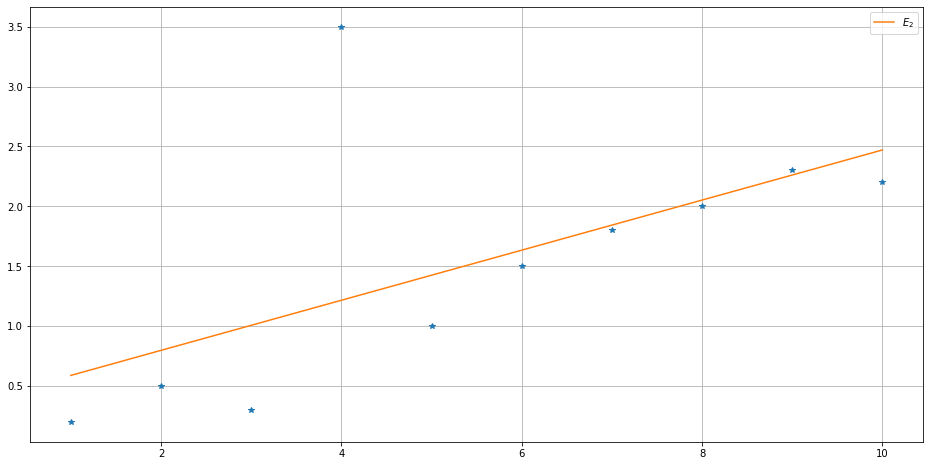

In [2]:
import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt

x = np.linspace(1, 10, 10)
y = [0.2, 0.5, 0.3, 3.5, 1.0, 1.5, 1.8, 2.0, 2.3, 2.2]

A = lambda x: [[np.sum(np.power(x, 2)), np.sum(x)], [np.sum(x), np.shape(x)[0]]]
b = lambda x, y: [np.sum(np.multiply(x, y)), np.sum(y)]

beta_E2 = np.linalg.solve(A(x), b(x, y))
print('Beta values: {}'.format(beta_E2))

# plot fit
plt.figure(figsize=(16,8))
plt.plot(x, y, '*')
plt.plot(x, x * beta_E2[0] + beta_E2[1], label='$E_2$')
plt.legend()
plt.grid()

In [3]:
import scipy.optimize

# Function definitions
def fit1(x0,t):
    x,y=t
    return np.max(np.abs(x0[0]*x + x0[1]-y))
def fit2(x0,t):
    x,y=t
    return np.sum(np.abs(x0[0]*x + x0[1]-y))
def fit3(x0,t):
    x,y=t
    return np.sum(np.power(np.abs(x0[0]*x + x0[1]-y), 2))

Optimization terminated successfully.
         Current function value: 1.464330
         Iterations: 52
         Function evaluations: 98
Optimization terminated successfully.
         Current function value: 3.640022
         Iterations: 64
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 6.234182
         Iterations: 49
         Function evaluations: 92
Optimization terminated successfully.
         Current function value: 0.230040
         Iterations: 59
         Function evaluations: 115
Optimization terminated successfully.
         Current function value: 1.385764
         Iterations: 56
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.288000
         Iterations: 54
         Function evaluations: 102


Text(0.5, 1.0, 'Norm without Outlier')

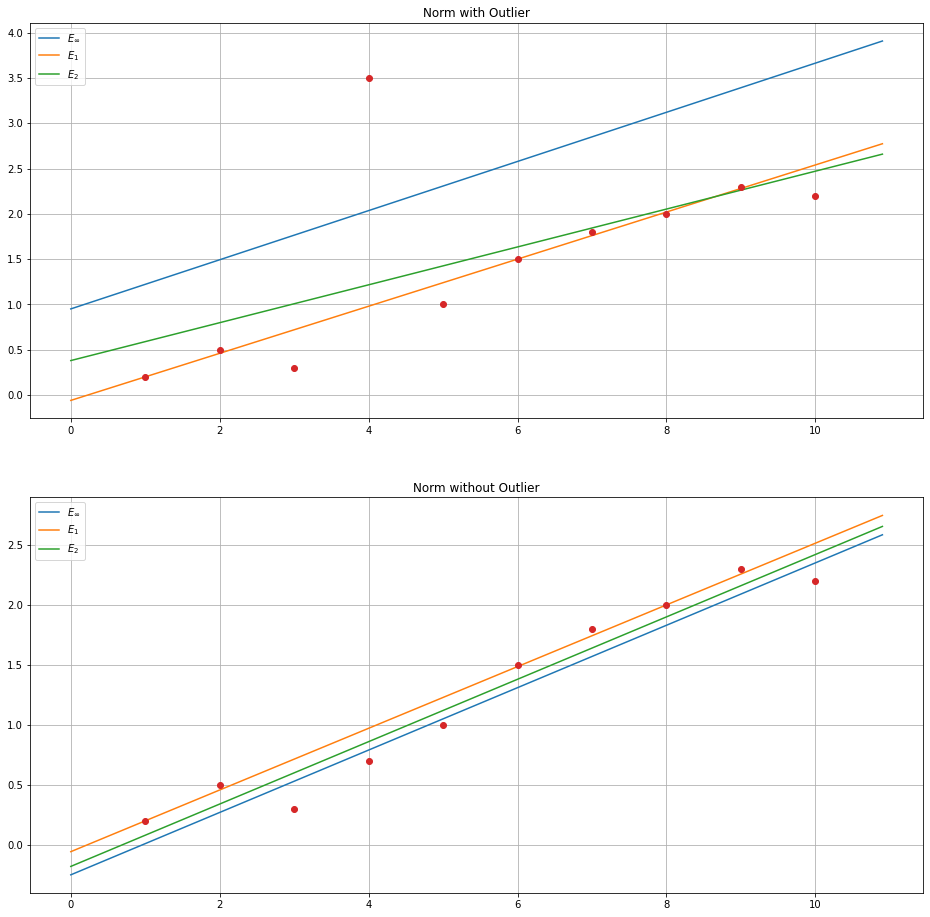

In [4]:
x0 = np.array([1,1])
xf = np.arange(0,11,0.1)

# plot first set of points with outlier
x1 = np.arange(1,11)
y1 = np.array([0.2, 0.5, 0.3, 3.5, 1.0, 1.5, 1.8, 2.0, 2.3, 2.2])
t1 = (x1, y1)

p11 = scipy.optimize.fmin(fit1, x0, args=(t1,));
p12 = scipy.optimize.fmin(fit2, x0, args=(t1,));
p13 = scipy.optimize.fmin(fit3, x0, args=(t1,));

y11 = np.polyval(p11, xf)
y12 = np.polyval(p12, xf)
y13 = np.polyval(p13, xf)

# plot second set of points without outlier
x2 = np.arange(1,11)
y2 = np.array([0.2, 0.5, 0.3, 0.7, 1.0, 1.5, 1.8, 2.0, 2.3, 2.2])
t2 = (x2, y2)

p21 = scipy.optimize.fmin(fit1, x0, args=(t2,));
p22 = scipy.optimize.fmin(fit2, x0, args=(t2,));
p23 = scipy.optimize.fmin(fit3, x0, args=(t2,));

y21 = np.polyval(p21, xf)
y22 = np.polyval(p22, xf)
y23 = np.polyval(p23, xf)

plt.figure(figsize=(16,16))
plt.subplot(211)
plt.plot(xf, y11, label='$E_\infty$')
plt.plot(xf, y12, label='$E_1$')
plt.plot(xf, y13, label='$E_2$')
plt.plot(x1, y1, 'o', LineWidth=2)
plt.grid()
plt.legend()
plt.title('Norm with Outlier')

plt.subplot(212)
plt.plot(xf, y21, label='$E_\infty$')
plt.plot(xf, y22, label='$E_1$')
plt.plot(xf, y23, label='$E_2$')
plt.plot(x2, y2, 'o', LineWidth=2)
plt.grid()
plt.legend()
plt.title('Norm without Outlier')

## Linearizing Data

Data transformations can be applied to transform data into a different coordinate space to perform line-fitting within the new coordinate space.

$$
\begin{align}
Y &= \ln(y) \\
X &= x \\
\beta_3 &= \ln \beta_2 \\
\\
f(x) &= y = \beta_2 \exp(\beta_1 x)
\end{align}
$$

using the transform mapping

$$
(x_i, y_i) \rightarrow (x_i, \ln y_i) = (X_i, Y_i)
$$

In [5]:
from sympy import *

# setup symbolic variables
n, k = symbols('n, k')
xs = IndexedBase('x')
ys = IndexedBase('y')
beta = IndexedBase(r'\beta')

# symbolic equation of model
f = beta[1] * xs[k] + beta[2]
# f_eval = f.subs([(n, len(x))]).doit().subs([(xs[idx+1], i) for idx, i in enumerate(x)]).subs([ys[idx+1], i] for idx, i in enumerate(y)).doit()

# general equation for L1 and L2 error metric
Einf = f - ys[k]
E1 = Sum((Abs(f - ys[k])), (k, 1, n))
E2 = Sum((f - ys[k]) ** 2, (k, 1, n))

display(Einf.subs([(xs[idx+1], i) for idx, i in enumerate(x)]).subs([ys[idx+1], i] for idx, i in enumerate(y)).doit())

E1_eval = E1.subs([(n, len(x))]).doit().subs([(xs[idx+1], i) for idx, i in enumerate(x)]).subs([ys[idx+1], i] for idx, i in enumerate(y)).doit()
E2_eval = E2.subs([(n, len(x))]).doit().subs([(xs[idx+1], i) for idx, i in enumerate(x)]).subs([ys[idx+1], i] for idx, i in enumerate(y)).doit()

# compute derivative of L1
E1_b1 = diff(E1_eval, beta[1])
E1_b2 = diff(E1_eval, beta[2])
# display(E1_b1)
# display(E1_b2)

# compute derivative of L2
E2_b1 = diff(E2_eval, beta[1])
E2_b2 = diff(E2_eval, beta[2])
# display(E2_b1)
# display(E2_b2)

E1_betas = solve(Matrix((E1_b1, E1_b2)))
display(E1_betas)

E2_betas = solve(Matrix((E2_b1, E2_b2)))
display(E2_betas)

\beta[1]*x[k] + \beta[2] - y[k]

ValueError: 
Can't calculate derivative wrt re(\beta[1]) + I*im(\beta[1]).

In [6]:
from sympy import symbols, IndexedBase, Matrix, Sum, linsolve

# setup symbolic variables
n, k = symbols('n, k')
xs = IndexedBase('x')
ys = IndexedBase('y')

# setup matrix A and b
A = Matrix(([Sum(xs[k] ** 2, (k, 1, n)), Sum(xs[k], (k, 1, n))], [Sum(xs[k], (k, 1, n)), n]))
b = Matrix(([Sum(xs[k] * ys[k], (k, 1, n)), Sum(ys[k], (k, 1, n))]))

# setup linear equation solver
eq = linsolve((A, b))

# display each equation
display(A)
display(b)
display(eq)

# subsitute and solve
betas = eq.subs([(n, len(x))]).doit().subs([(xs[idx+1], i) for idx, i in enumerate(x)]).subs([ys[idx+1], i] for idx, i in enumerate(y)).doit()
display(betas)

Matrix([
[Sum(x[k]**2, (k, 1, n)), Sum(x[k], (k, 1, n))],
[   Sum(x[k], (k, 1, n)),                    n]])

Matrix([
[Sum(x[k]*y[k], (k, 1, n))],
[     Sum(y[k], (k, 1, n))]])

FiniteSet((Sum((n*y[k] - Sum(y[k], (k, 1, n)))*x[k], (k, 1, n))/(n*Sum(x[k]**2, (k, 1, n)) - Sum(x[k], (k, 1, n))**2), Sum((x[k]*Sum(y[k], (k, 1, n)) - y[k]*Sum(x[k], (k, 1, n)))*x[k], (k, 1, n))/(n*Sum(x[k]**2, (k, 1, n)) - Sum(x[k], (k, 1, n))**2)))

FiniteSet((0.209090909090909, 0.38))